<h1> Battle of Neighborhoods </h1>

<h2> 1. Introduction </h2>

<h3> 1.1 Background </h3>

New York is a major central city for diversity since many people from different cultural atmospheres have brought their families and dreams to New York City. The city has consistently seen people from around the world move to the city and call it home. It has been a center for trade and economic growth. New York is known world wide as a cultural melting pot. While other states have had immigration surges, none have compared to the diversity and sheer number of immigrants that have made their way to the City. So these number of varies cultures combined to create a great diversity for itself. Since People from all over the world tend to come up here, we can see some many of their cultural aspects Transport, Food, Clothing, and so on...

<h3> 1.2 Problem </h3>

Restaurant is a place where people come to have food and drinks for a cost, People love to do many things and try something new or stick with their own routines, it depends on the individual and there are so many of them with different cultural and various aspects in New York city. There are so many cuisines, which is based on the style of cooking, the ingredients, dishes and techniques. For our problem lets stick with Indian cuisine.

Let's assume in this one of the world's most diverse region we want to open an Indian restaurant, so what are all the factors we have to take into account such as follows,

Market Places
Competition in particular location
Aiding places that make people come to restaurants like Gym, Entertaining Public places
Population
Menu from competitors
And so on... So our solution needs to be data driven for avoiding or considering low risk criteria and high success rate and thus apply our overall knowledge in the techniques and the tools gained so far in this course.

<h3> 1.3 Interest </h3>


The main interest of the Business to be started as an Indian Cuisine restaurant would be to know about the many criteria that leads to come to a data driven conclusion for selecting the best neighborhood for opening one. But some of the criteria we are gonna be focusing on in our project is as follows,

Best Neighborhood for opening Restaurant (Indian Cuisine) in New York.
Area which lack Indian Restaurants.
Places with best Indian Cuisine.
Areas with Potential Indian Restaurants.

<h2> 2. Data Acquisition and Cleaning </h2>

<h3> 2.1 Data Sources </h3>

Since we will be focusing on New York for opening our restaurant, we will be gathering the data for the same and the three main data we are gonna use are the New York Neighborhood data which we already used in the Neighborhoods in New York and the data about the cuisines in New York and the Geo spacial data of boundaries of the Neighborhoods in New York.

<h4> 2.1.1 Data 1: </h4>

New York Neighborhood Data which will be used to get to know about the various neighborhoods which are gonna take into consideration for our Project.


<img src='d1.jpg' />

Data source : https://cocl.us/new_york_dataset

<h4> 2.1.2 Data 2: </h4>

Geo-spacial data of the New York to get a better understanding of the neighborhoods in it and their corresponding locations in the Folium map would make certain things clear for the Project. This will be achieved using the acquired data and visualize the same using Choropleth maps.

<img src = 'd2.jpg' />

Data source : https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm

<h4> 2.1.3 Data 3: </h4>

Finally the data going to be collected/acquired from the Foursquare API about the various restaurants in each neighborhood of New York city especially Indian cuisine, which will be used for acquiring the information regarding same for all the venues of each neighborhood.

Data source : <a> Foursquare </a>

<h3> 2.2 Data Cleaning and approach </h3>

<li> Acquire the data from the various sources as mentioned below, 
    <ul>New York neighborhood data from <a> https://cocl.us/new_york_dataset </a></ul>
        <ul> Borough Boundaries data from <a> https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm </a></ul>
        <ul> Indian Cuisine related data from <a>Foursquare</a> </ul> </li>
<li> Filter the data for the required data acquired from Foursqaure which is only about Indian Cuisine. </li>
<li> Acquire the tips and from that get the rating of every restaurant in the neighborhood of New York. </li>
<li> Visualize the findings using Matplot lib and Folium for better understanding. </li>

<h2> 3. Exploratory Data Analysis </h2>

<h3> 3.1 Relationship between the neighborhood and the restaurant </h3>

In [2]:
import pandas as pd
import numpy as np
import requests
import os

import folium # For rendering maps

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # Acquiring latitude and longitude

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print('Imported Libraries.')
print('------------------------------------------------------------------------------------------------------------------------')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0-pyh9f0ad1d_0



geopy-2.0.0          | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: d

Define function to create a data set about New York from the acquired data.

In [3]:

def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
    
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
    return new_york_data

In [4]:
df_ny = get_new_york_data()

In [5]:
df_ny.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [6]:
df_ny.shape

(306, 4)

In [7]:
df_ny[df_ny['Neighborhood']=='Woodlawn']

,Borough,Neighborhood,Latitude,Longitude
7,Bronx,Woodlawn,40.898273,-73.867315



Initially get to know about the various boroughs and neighborhoods using a bar chart in New York.

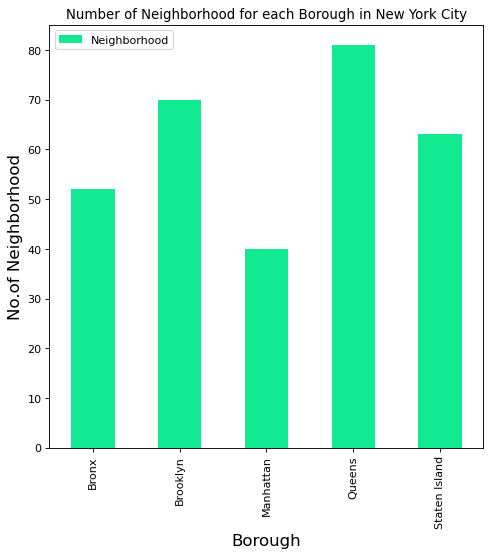

In [8]:
plt.figure(figsize=(7,7), dpi = 80)
# title
plt.title('Number of Neighborhood for each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
df_ny.groupby('Borough')['Neighborhood'].count().plot(kind='bar', color='#12EA92')
#legend
plt.legend()
#displays the plot
plt.show()

Define function for acquiring the latitude and longitude from the provided location

In [9]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

Define a function to get the details of the venue by accessing the Foursquare API

In [10]:
def get_venues(lat,lng):
    
    #set variables
    radius=1000
    LIMIT=100
    CLIENT_ID =  # your Foursquare ID
    CLIENT_SECRET = # your Foursquare Secret
    VERSION = '20180605' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

def get_venue_details(venue_id):
        
    CLIENT_ID =  # your Foursquare ID
    CLIENT_SECRET =  # your Foursquare Secret
    VERSION = '20180605' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    print(url)
    
    results = requests.get(url).json()
    #print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

Get a list of each and every Indian Cuisine in the New York.

In [11]:
vns = get_venues(40.898273,-73.867315)
vns[vns['Category']=='Indian Restaurant']
vns.to_csv('vns.csv', index=False)

In [12]:
ind_res = vns[vns['Category']=='Indian Restaurant'].values.tolist()
ind_res

[['4c0448d9310fc9b6bf1dc761', 'Curry Spot', 'Indian Restaurant']]

In [13]:
len(vns[vns['Category']=='Indian Restaurant'].values.tolist()) > 0

True

In [14]:
print("Length : ", len(df_ny.values.tolist()))
limit=0
for row in df_ny.values.tolist():
    if limit == 10:
        break
    print(row)
    limit += 1

Length :  306
['Bronx', 'Wakefield', 40.89470517661, -73.84720052054902]
['Bronx', 'Co-op City', 40.87429419303012, -73.82993910812398]
['Bronx', 'Eastchester', 40.887555677350775, -73.82780644716412]
['Bronx', 'Fieldston', 40.89543742690383, -73.90564259591682]
['Bronx', 'Riverdale', 40.890834493891305, -73.9125854610857]
['Bronx', 'Kingsbridge', 40.88168737120521, -73.90281798724604]
['Manhattan', 'Marble Hill', 40.87655077879964, -73.91065965862981]
['Bronx', 'Woodlawn', 40.89827261213805, -73.86731496814176]
['Bronx', 'Norwood', 40.87722415599446, -73.8793907395681]
['Bronx', 'Williamsbridge', 40.88103887819211, -73.85744642974207]


In [14]:
# prepare neighborhood list that contains indian resturants
column_names=['Borough', 'Neighborhood', 'ID','Name']
indian_rest_ny=pd.DataFrame(columns=column_names)

print('Indian restaurants in\n---------------------')
       
for row in df_ny.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    #venues = get_venues(Latitude,Longitude)
    
    indian_resturants=venues[venues['Category']=='Indian Restaurant']
    if len(indian_resturants) > 0:
        print(Neighborhood+', '+Borough+' : '+str(len(indian_resturants)))
    for resturant_detail in indian_resturants.values.tolist():
        id, name , category=resturant_detail
        indian_rest_ny = indian_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
indian_rest_ny.to_csv('indian_rest_ny.csv', index=False)
print('Completed constructing the Indian cuisine restaurants data set')

Indian restaurants in
---------------------
Woodlawn, Bronx : 1
Parkchester, Bronx : 1
Spuyten Duyvil, Bronx : 1
Concourse, Bronx : 1
Unionport, Bronx : 1
Bay Ridge, Brooklyn : 2
Brighton Beach, Brooklyn : 1
Flatbush, Brooklyn : 2
East Flatbush, Brooklyn : 1
Kensington, Brooklyn : 2
Gowanus, Brooklyn : 1
Fort Greene, Brooklyn : 1
Clinton Hill, Brooklyn : 2
Prospect Lefferts Gardens, Brooklyn : 1
Ocean Hill, Brooklyn : 2
Prospect Park South, Brooklyn : 2
North Side, Brooklyn : 1
South Side, Brooklyn : 1
Fort Hamilton, Brooklyn : 1
Washington Heights, Manhattan : 1
Hamilton Heights, Manhattan : 2
Manhattanville, Manhattan : 2
Central Harlem, Manhattan : 2
East Harlem, Manhattan : 1
Yorkville, Manhattan : 3
Roosevelt Island, Manhattan : 1
Upper West Side, Manhattan : 2
Chelsea, Manhattan : 1
Greenwich Village, Manhattan : 1
Tribeca, Manhattan : 1
West Village, Manhattan : 2
Manhattan Valley, Manhattan : 2
Morningside Heights, Manhattan : 1
Gramercy, Manhattan : 5
Astoria, Queens : 2
Woods

In [16]:
column_names=['Borough', 'Neighborhood', 'ID','Name']
#indian_rest_ny=pd.DataFrame(columns=column_names)
indian_rest_ny = pd.read_csv('indian_rest_ny.csv')
indian_rest_ny.head()

,Borough,Neighborhood,ID,Name
0,Bronx,Woodlawn,4c0448d9310fc9b6bf1dc761,Curry Spot
1,Bronx,Parkchester,4c194631838020a13e78e561,Melanies Roti Bar And Grill
2,Bronx,Spuyten Duyvil,4c04544df423a593ac83d116,Cumin Indian Cuisine
3,Bronx,Concourse,551b7f75498e86c00a0ed2e1,Hungry Bird
4,Bronx,Unionport,4c194631838020a13e78e561,Melanies Roti Bar And Grill


In [15]:
indian_rest_ny.head()

,Borough,Neighborhood,ID,Name
0,Bronx,Woodlawn,4c0448d9310fc9b6bf1dc761,Curry Spot
1,Bronx,Parkchester,4c194631838020a13e78e561,Melanies Roti Bar And Grill
2,Bronx,Spuyten Duyvil,4c04544df423a593ac83d116,Cumin Indian Cuisine
3,Bronx,Concourse,551b7f75498e86c00a0ed2e1,Hungry Bird
4,Bronx,Unionport,4c194631838020a13e78e561,Melanies Roti Bar And Grill


In [17]:
indian_rest_ny.shape

(142, 4)

Using a bar chart visualize the number of restaurants which serves Indian cuisine for each and every borough in New York city.

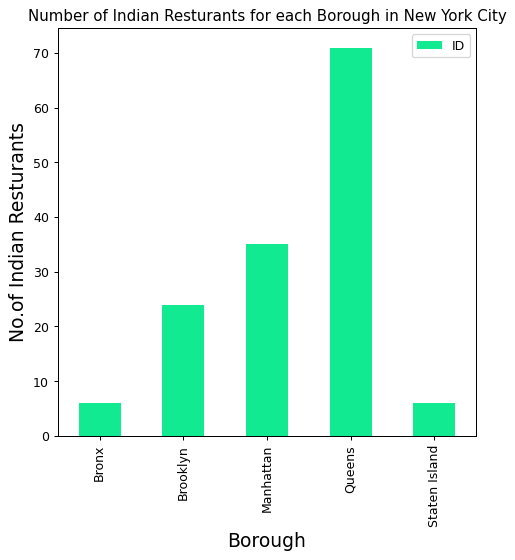

In [18]:

plt.figure(figsize=(6,6), dpi = 90)
# title
plt.title('Number of Indian Resturants for each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Indian Resturants', fontsize=15)
#giving a bar plot
indian_rest_ny.groupby('Borough')['ID'].count().plot(kind='bar', color='#12EA92')
#legend
plt.legend()
#displays the plot
plt.show()

Do visualize the same for Top 15 neighborhoods based on the number of Indian cuisine restaurants in New York city.

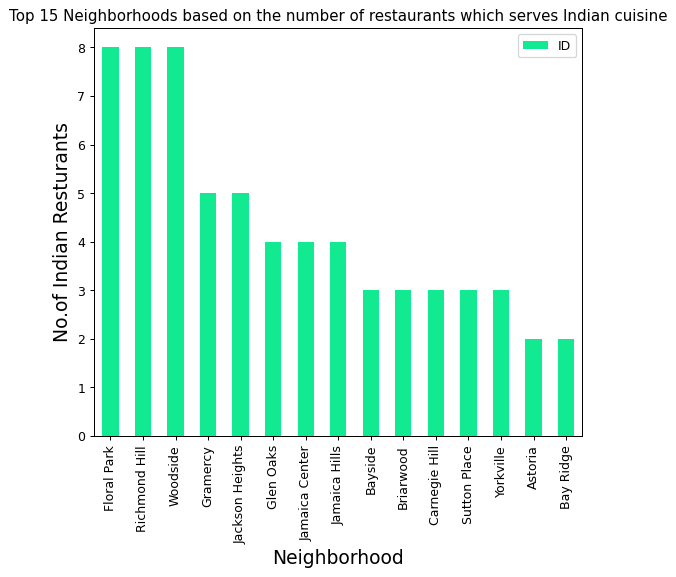

In [19]:
plt.figure(figsize=(7,6), dpi = 90)
# title
plt.title('Top 15 Neighborhoods based on the number of restaurants which serves Indian cuisine')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Indian Resturants', fontsize=15)
#giving a bar plot
indian_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(15).plot(kind='bar', color='#12EA92')
#legend
plt.legend()
#displays the plot
plt.show()

Seems that Floral Park has the highest number of Indian restaurant in New York city.

In [20]:
indian_rest_ny[indian_rest_ny['Neighborhood']=='Floral Park']

,Borough,Neighborhood,ID,Name
101,Queens,Floral Park,4e4e3e22bd4101d0d7a5c2d1,Kerala Kitchen
102,Queens,Floral Park,527ffc0811d2d329d5e49abd,Jackson Diner
103,Queens,Floral Park,4b647b56f964a520c4b62ae3,Usha Foods & Usha Sweets
104,Queens,Floral Park,4b787c49f964a5209cd12ee3,Santoor Indian Restaurant
105,Queens,Floral Park,4c0c01e0bbc676b00d6b4cd5,Mumbai Xpress
106,Queens,Floral Park,4c76ff35a5676dcb72671721,Flavor Of India
107,Queens,Floral Park,4df0f39dd4c04d0392c853ea,Sagar Chinese
108,Queens,Floral Park,4e6bfe1c7d8b2c711b17bbe5,Surya sweets and snacks


Acquire the detail about all the restaurants from the Foursquare API

In [21]:
# prepare neighborhood list that contains indian resturants
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
indian_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1


for row in indian_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    if count == 1:
        print(row)
    try:
        venue_details=get_venue_details(ID)
        #print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(indian_rest_ny),')','processed')
    indian_rest_stats_ny = indian_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1
print("Total Processed : ", count)
indian_rest_stats_ny.to_csv('indian_rest_stats_ny.csv', index=False)

['Bronx', 'Woodlawn', '4c0448d9310fc9b6bf1dc761', 'Curry Spot']
https://api.foursquare.com/v2/venues/4c0448d9310fc9b6bf1dc761?&client_id=CROR0TLNBZEMVIFU11M2MWBAWHHWPCBJ1UCTEPWX5UZ1NH0U&client_secret=1UHFCYHNBUCCM2VYDH5VYLWC5VQJ44H53JD1LKY11JMCLW1K&v=20180605
( 1 / 142 ) processed
https://api.foursquare.com/v2/venues/4c194631838020a13e78e561?&client_id=CROR0TLNBZEMVIFU11M2MWBAWHHWPCBJ1UCTEPWX5UZ1NH0U&client_secret=1UHFCYHNBUCCM2VYDH5VYLWC5VQJ44H53JD1LKY11JMCLW1K&v=20180605
( 2 / 142 ) processed
https://api.foursquare.com/v2/venues/4c04544df423a593ac83d116?&client_id=CROR0TLNBZEMVIFU11M2MWBAWHHWPCBJ1UCTEPWX5UZ1NH0U&client_secret=1UHFCYHNBUCCM2VYDH5VYLWC5VQJ44H53JD1LKY11JMCLW1K&v=20180605
( 3 / 142 ) processed
https://api.foursquare.com/v2/venues/551b7f75498e86c00a0ed2e1?&client_id=CROR0TLNBZEMVIFU11M2MWBAWHHWPCBJ1UCTEPWX5UZ1NH0U&client_secret=1UHFCYHNBUCCM2VYDH5VYLWC5VQJ44H53JD1LKY11JMCLW1K&v=20180605
( 4 / 142 ) processed
https://api.foursquare.com/v2/venues/4c194631838020a13e78e561?&c

Data set created based on the venue details acquired from Foursquare

In [22]:
indian_rest_stats_ny.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,Woodlawn,4c0448d9310fc9b6bf1dc761,Curry Spot,5,7.7,10
1,Bronx,Parkchester,4c194631838020a13e78e561,Melanies Roti Bar And Grill,3,6.5,2
2,Bronx,Spuyten Duyvil,4c04544df423a593ac83d116,Cumin Indian Cuisine,13,5.8,9
3,Bronx,Concourse,551b7f75498e86c00a0ed2e1,Hungry Bird,8,7.0,3
4,Bronx,Unionport,4c194631838020a13e78e561,Melanies Roti Bar And Grill,3,6.5,2


In [23]:
indian_rest_stats_ny.shape

(142, 7)

In [24]:
indian_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       142 non-null    object 
 1   Neighborhood  142 non-null    object 
 2   ID            142 non-null    object 
 3   Name          142 non-null    object 
 4   Likes         142 non-null    object 
 5   Rating        142 non-null    float64
 6   Tips          142 non-null    object 
dtypes: float64(1), object(6)
memory usage: 7.9+ KB


In [25]:
convert_types = { 'Likes': float, 'Tips': float }
indian_rest_stats_ny = indian_rest_stats_ny.astype(convert_types)
indian_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       142 non-null    object 
 1   Neighborhood  142 non-null    object 
 2   ID            142 non-null    object 
 3   Name          142 non-null    object 
 4   Likes         142 non-null    float64
 5   Rating        142 non-null    float64
 6   Tips          142 non-null    float64
dtypes: float64(3), object(4)
memory usage: 7.9+ KB


<h5> Restaurant with most tips </h5>

In [26]:
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Tips'].idxmax()]

Borough                        Manhattan
Neighborhood                    Gramercy
ID              4a12eb1ff964a52099771fe3
Name                               Dhaba
Likes                                495
Rating                               8.3
Tips                                 166
Name: 51, dtype: object

<h5> Highly rated Restaurant </h5>

In [27]:
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Rating'].idxmax()]

Borough                        Manhattan
Neighborhood                     Tribeca
ID              4bbb9dbded7776b0e1ad3e51
Name                    Tamarind TriBeCa
Likes                                600
Rating                               9.1
Tips                                 150
Name: 41, dtype: object

<h5> Most Liked Restaurant </h5>

In [28]:
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Likes'].idxmax()]

Borough                        Manhattan
Neighborhood                     Tribeca
ID              4bbb9dbded7776b0e1ad3e51
Name                    Tamarind TriBeCa
Likes                                600
Rating                               9.1
Tips                                 150
Name: 41, dtype: object

Create a data set with the average rating of all the restaurants in the particular neighborhood of New York city

In [29]:
ny_neighborhood_stats=indian_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']

<h5> <i> List of Top 10 neighborhoods which are in their order of average rating of Indian cuisine restaurants </i> </h5>

In [30]:
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
66,Tribeca,9.10
11,Civic Center,9.10
4,Blissville,9.10
62,Sunnyside,9.10
29,Greenwich Village,8.90
71,West Village,8.85
0,Astoria,8.80
10,Chelsea,8.70
49,Prospect Lefferts Gardens,8.70
56,Ridgewood,8.60


<h5> Boroughs sorted with high average rating of Indian cuisine restaurants in New York city </h5>

In [31]:
ny_borough_stats=indian_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']

In [32]:
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
2,Manhattan,8.311429
1,Brooklyn,7.654167
0,Bronx,6.750000
3,Queens,6.556338
4,Staten Island,5.300000


Bar chart visualizing the restaurants with average rating based on Boroughs

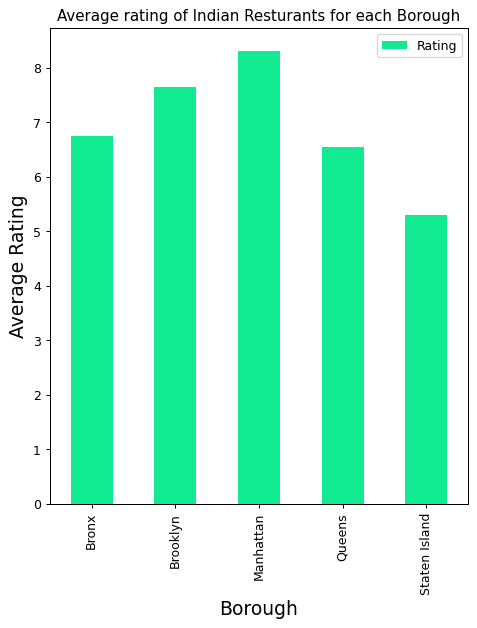

In [33]:
plt.figure(figsize=(6,7), dpi = 90)
# title
plt.title('Average rating of Indian Resturants for each Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('Average Rating', fontsize=15)
#giving a bar plot
indian_rest_stats_ny.groupby('Borough').mean()['Rating'].plot(kind='bar', color='#12EA92')
#legend
plt.legend()
#displays the plot
plt.show()

List of neighborhoods with average rating greater than or equal to 9 for Indian cuisine

In [34]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=9.0]

In [35]:
ny_neighborhood_stats

,Neighborhood,Average Rating
4,Blissville,9.1
11,Civic Center,9.1
62,Sunnyside,9.1
66,Tribeca,9.1


In [36]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,df_ny, on='Neighborhood')

In [37]:
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]

In [38]:
ny_neighborhood_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Queens,Blissville,40.737251,-73.932442,9.1
1,Manhattan,Civic Center,40.715229,-74.005415,9.1
2,Queens,Sunnyside,40.740176,-73.926916,9.1
3,Staten Island,Sunnyside,40.612760,-74.097126,9.1
4,Manhattan,Tribeca,40.721522,-74.010683,9.1


Visualize the

In [39]:
# create map and display it
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)

In [40]:
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='#EA1253',
            fill=True,
            fill_color='#12EA92',
            fill_opacity=0.4
        )
    )

In [41]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'

In [42]:
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add incidents to map
ny_map.add_child(incidents)

Create a choropleth map to visualize the borough based on the average rating for better understanding.

In [56]:
import json
ny_map = folium.Map(location=geo_location('New York'), zoom_start=11)
url = 'https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm'
#ny_geo = requests.get(url).json()
#ny_geo = r'Borough_Boundaries.geojson'
#ny_geo = json.loads('Borough_Boundaries.geojson')
with open('geo_bound.json') as f:
  ny_geo = json.load(f)
#print(data)

ny_map.choropleth(
    geo_data=ny_geo,
    data=ny_borough_stats,
    columns=['Borough', 'Average Rating'],
    key_on='feature.properties.boro_name',
    fill_color='YlGnBu',
    fill_opacity=0.6, 
    line_opacity=0.4,
    legend_name='Average Rating'
)

# display map
# as this is huge map data , we will save it to a file
ny_map.save('rated-map2.html')


<h2> 4. Conclusion </h2>

Based on the Data Analysis and Visualization using Folium and Matplotlib we have rendered various bar charts and two maps from which we can come to a better understanding of the interests we had earlier to be discovered which are specified as follows.

<li> Best Neighborhood for opening Restaurant (Indian Cuisine) in New York. </li>
     <ul> Astoria(Queens), Blissville(Queens), Civic Center(Manhattan) are some of the best neighborhoods for indian cuisine. </ul>
<li> Area which lack Indian Restaurants. </li>
     <ul> Staten Island ranks last in average rating of Indian Resturants. </ul>
<li> Places with best Indian Cuisine. </li>
     <ul> Manhattan is the best place to stay if you prefer Indian Cuisine. </ul>
<li> Areas with Potential Indian Restaurants. </li>
     <ul> Manhattan have potential Indian Resturant Market </ul>